# Task 2 - Binary Classification Problem

In [93]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import os # accessing directory structure

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
training_file = 'training.csv'
validation_file = 'validation.csv'
training_data = pd.read_csv(training_file, delimiter=';')
validation_data = pd.read_csv(validation_file, delimiter=';')


# Print the first few entries of the data
display(training_data.head())

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable18,variable19,classLabel
0,a,"17,92","5,4e-05",u,g,c,v,"1,75",f,t,1,t,g,80.0,5,800000.0,t,0,no.
1,b,"16,92","3,35e-05",y,p,k,v,"0,29",f,f,0,f,s,200.0,0,2000000.0,NaN,0,no.
2,b,"31,25","0,0001125",u,g,ff,ff,0,f,t,1,f,g,96.0,19,960000.0,t,0,no.
3,a,"48,17","0,0001335",u,g,i,o,"0,335",f,f,0,f,g,0.0,120,0.0,NaN,0,no.
4,b,"32,33","0,00035",u,g,k,v,"0,5",f,f,0,t,g,232.0,0,2320000.0,f,0,no.


In [94]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3700 entries, 0 to 3699
Data columns (total 19 columns):
variable1     3661 non-null object
variable2     3661 non-null object
variable3     3700 non-null object
variable4     3636 non-null object
variable5     3636 non-null object
variable6     3634 non-null object
variable7     3634 non-null object
variable8     3700 non-null object
variable9     3700 non-null object
variable10    3700 non-null object
variable11    3700 non-null int64
variable12    3700 non-null object
variable13    3700 non-null object
variable14    3600 non-null float64
variable15    3700 non-null int64
variable17    3600 non-null float64
variable18    1555 non-null object
variable19    3700 non-null int64
classLabel    3700 non-null object
dtypes: float64(2), int64(3), object(14)
memory usage: 549.3+ KB


In [95]:
training_data.describe()

,variable11,variable14,variable15,variable17,variable19
count,3700.000000,3600.000000,3700.000000,3.600000e+03,3700.000000
mean,4.160000,162.695000,2246.705946,1.626950e+06,0.925405
std,6.750553,156.045682,8708.571126,1.560457e+06,0.262772
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,0.000000e+00,1.000000
50%,2.000000,120.000000,113.000000,1.200000e+06,1.000000
75%,6.000000,280.000000,1059.750000,2.800000e+06,1.000000
max,67.000000,1160.000000,100000.000000,1.160000e+07,1.000000


In [96]:
validation_data.shape

(200, 19)

In [97]:
total = pd.concat([training_data, validation_data], axis=0)

In [98]:
total.shape

(3900, 19)

In [99]:
total['variable2'] = total['variable2'].str.replace(',','.').astype(np.float64)
total['variable3'] = total['variable3'].str.replace(',','.').astype(np.float64)
total['variable8'] = total['variable8'].str.replace(',','.').astype(np.float64)

In [100]:
total[:training_data.shape[0]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3700 entries, 0 to 3699
Data columns (total 19 columns):
variable1     3661 non-null object
variable2     3661 non-null float64
variable3     3700 non-null float64
variable4     3636 non-null object
variable5     3636 non-null object
variable6     3634 non-null object
variable7     3634 non-null object
variable8     3700 non-null float64
variable9     3700 non-null object
variable10    3700 non-null object
variable11    3700 non-null int64
variable12    3700 non-null object
variable13    3700 non-null object
variable14    3600 non-null float64
variable15    3700 non-null int64
variable17    3600 non-null float64
variable18    1555 non-null object
variable19    3700 non-null int64
classLabel    3700 non-null object
dtypes: float64(5), int64(3), object(11)
memory usage: 578.1+ KB


### Focus on  variable18   (1555 non-null object)

In [101]:
len(total[total['variable18'].isnull()])

2256

In [102]:
# let's drop it.
total.drop('variable18', axis = 1, inplace = True)

In [103]:
total.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable19,classLabel
0,a,17.92,0.000054,u,g,c,v,1.750,f,t,1,t,g,80.0,5,800000.0,0,no.
1,b,16.92,0.000034,y,p,k,v,0.290,f,f,0,f,s,200.0,0,2000000.0,0,no.
2,b,31.25,0.000112,u,g,ff,ff,0.000,f,t,1,f,g,96.0,19,960000.0,0,no.
3,a,48.17,0.000133,u,g,i,o,0.335,f,f,0,f,g,0.0,120,0.0,0,no.
4,b,32.33,0.000350,u,g,k,v,0.500,f,f,0,t,g,232.0,0,2320000.0,0,no.


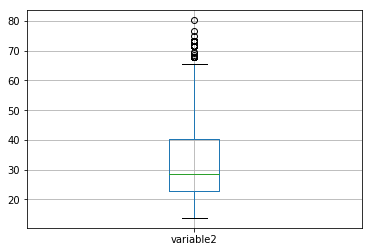

In [104]:
total[['variable2']].boxplot()

In [105]:
total['variable2'] = total['variable2'].fillna(total['variable2'].median())
total['variable3'] = total['variable3'].fillna(total['variable3'].median())
total['variable8'] = total['variable8'].fillna(total['variable8'].median())
total['variable14'] = total['variable14'].fillna(total['variable14'].median())
total['variable17'] = total['variable17'].fillna(total['variable17'].median())

In [106]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3900 entries, 0 to 199
Data columns (total 18 columns):
variable1     3858 non-null object
variable2     3900 non-null float64
variable3     3900 non-null float64
variable4     3834 non-null object
variable5     3834 non-null object
variable6     3831 non-null object
variable7     3831 non-null object
variable8     3900 non-null float64
variable9     3900 non-null object
variable10    3900 non-null object
variable11    3900 non-null int64
variable12    3900 non-null object
variable13    3900 non-null object
variable14    3900 non-null float64
variable15    3900 non-null int64
variable17    3900 non-null float64
variable19    3900 non-null int64
classLabel    3900 non-null object
dtypes: float64(5), int64(3), object(10)
memory usage: 578.9+ KB


In [107]:
for i in total.columns:
    if total[i].dtypes == "O":
        total[i] = total[i].fillna(total[i].mode()[0])

In [108]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3900 entries, 0 to 199
Data columns (total 18 columns):
variable1     3900 non-null object
variable2     3900 non-null float64
variable3     3900 non-null float64
variable4     3900 non-null object
variable5     3900 non-null object
variable6     3900 non-null object
variable7     3900 non-null object
variable8     3900 non-null float64
variable9     3900 non-null object
variable10    3900 non-null object
variable11    3900 non-null int64
variable12    3900 non-null object
variable13    3900 non-null object
variable14    3900 non-null float64
variable15    3900 non-null int64
variable17    3900 non-null float64
variable19    3900 non-null int64
classLabel    3900 non-null object
dtypes: float64(5), int64(3), object(10)
memory usage: 578.9+ KB


In [109]:
total.head()

,variable1,variable2,variable3,variable4,variable5,variable6,variable7,variable8,variable9,variable10,variable11,variable12,variable13,variable14,variable15,variable17,variable19,classLabel
0,a,17.92,0.000054,u,g,c,v,1.750,f,t,1,t,g,80.0,5,800000.0,0,no.
1,b,16.92,0.000034,y,p,k,v,0.290,f,f,0,f,s,200.0,0,2000000.0,0,no.
2,b,31.25,0.000112,u,g,ff,ff,0.000,f,t,1,f,g,96.0,19,960000.0,0,no.
3,a,48.17,0.000133,u,g,i,o,0.335,f,f,0,f,g,0.0,120,0.0,0,no.
4,b,32.33,0.000350,u,g,k,v,0.500,f,f,0,t,g,232.0,0,2320000.0,0,no.


## Drop "classLabel"
'classLabel' and 'variable19' , they have the same values so lets drop 'classLabel' and use 'variable19' as our new lable because it's already encoded!

In [110]:
print(total['classLabel'].value_counts())
print(total['variable19'].value_counts())

yes.    3517
no.      383
Name: classLabel, dtype: int64
1    3524
0     376
Name: variable19, dtype: int64


In [111]:
print(training_data['classLabel'].value_counts())
print(training_data['variable19'].value_counts())

yes.    3424
no.      276
Name: classLabel, dtype: int64
1    3424
0     276
Name: variable19, dtype: int64


In [112]:
total.drop('classLabel', axis = 1, inplace = True)

In [116]:
X = pd.get_dummies(total.iloc[:, total.columns != 'variable19'])
y = total['variable19']
X.shape,y.shape

((3900, 47), (3900,))

In [117]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 3120 samples.
Testing set has 780 samples.


In [118]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3120, 47), (780, 47), (3120,), (780,))

In [119]:
from sklearn.preprocessing import MinMaxScaler
sc_X = MinMaxScaler()
X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.transform(X_test)

In [120]:
# importing some machine learning models
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

In [121]:
svm_clf = SVC(probability=True)
dt_clf = DecisionTreeClassifier()
gnb_clf = GaussianNB()

In [122]:
from sklearn.metrics import fbeta_score, accuracy_score
from time import time

def train_predict(learner, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - X_train: features training set
       - y_train: variable19 or classLabel training set (it's the same!)
       - X_test: features testing set
       - y_test: variable19
    '''
    
    results = {}
    
    # Fit the learner to the training data
    start = time() # Get start time
    learner.fit(X_train,y_train)
    end = time() # Get end time
    
    # Calculate the training time
    results['train_time'] = end - start
        
    
    start = time() # Get start time
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time() # Get end time
    
    #Calculate the total prediction time
    results['pred_time'] = end - start
            
    #Compute accuracy on training samples
    results['acc_train'] = accuracy_score(y_train, predictions_train)
        
    # Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # Compute F-score on the training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_train, predictions_train, beta=0.5)
        
    # Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_test, predictions_test, beta=0.5)
       
    # Success
    print("Success")
        
    # Return the results
    return results

In [127]:
train_predict(svm_clf, X_train, y_train, X_test, y_test)

Success


{'train_time': 2.12414813041687,
 'pred_time': 0.4061458110809326,
 'acc_train': 0.9887820512820513,
 'acc_test': 0.9038461538461539,
 'f_train': 0.9910257309121503,
 'f_test': 0.921579087756735}

In [128]:
train_predict(dt_clf, X_train, y_train, X_test, y_test)

Success


{'train_time': 0.03290820121765137,
 'pred_time': 0.002991914749145508,
 'acc_train': 1.0,
 'acc_test': 0.9448717948717948,
 'f_train': 1.0,
 'f_test': 0.9585782255807447}

In [131]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train_sc, y_train)

y_pred = xgb_model.predict(X_test_sc)

accuracy_score(y_test, y_pred)


C:\Users\mahmoud\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.9474358974358974

In [132]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

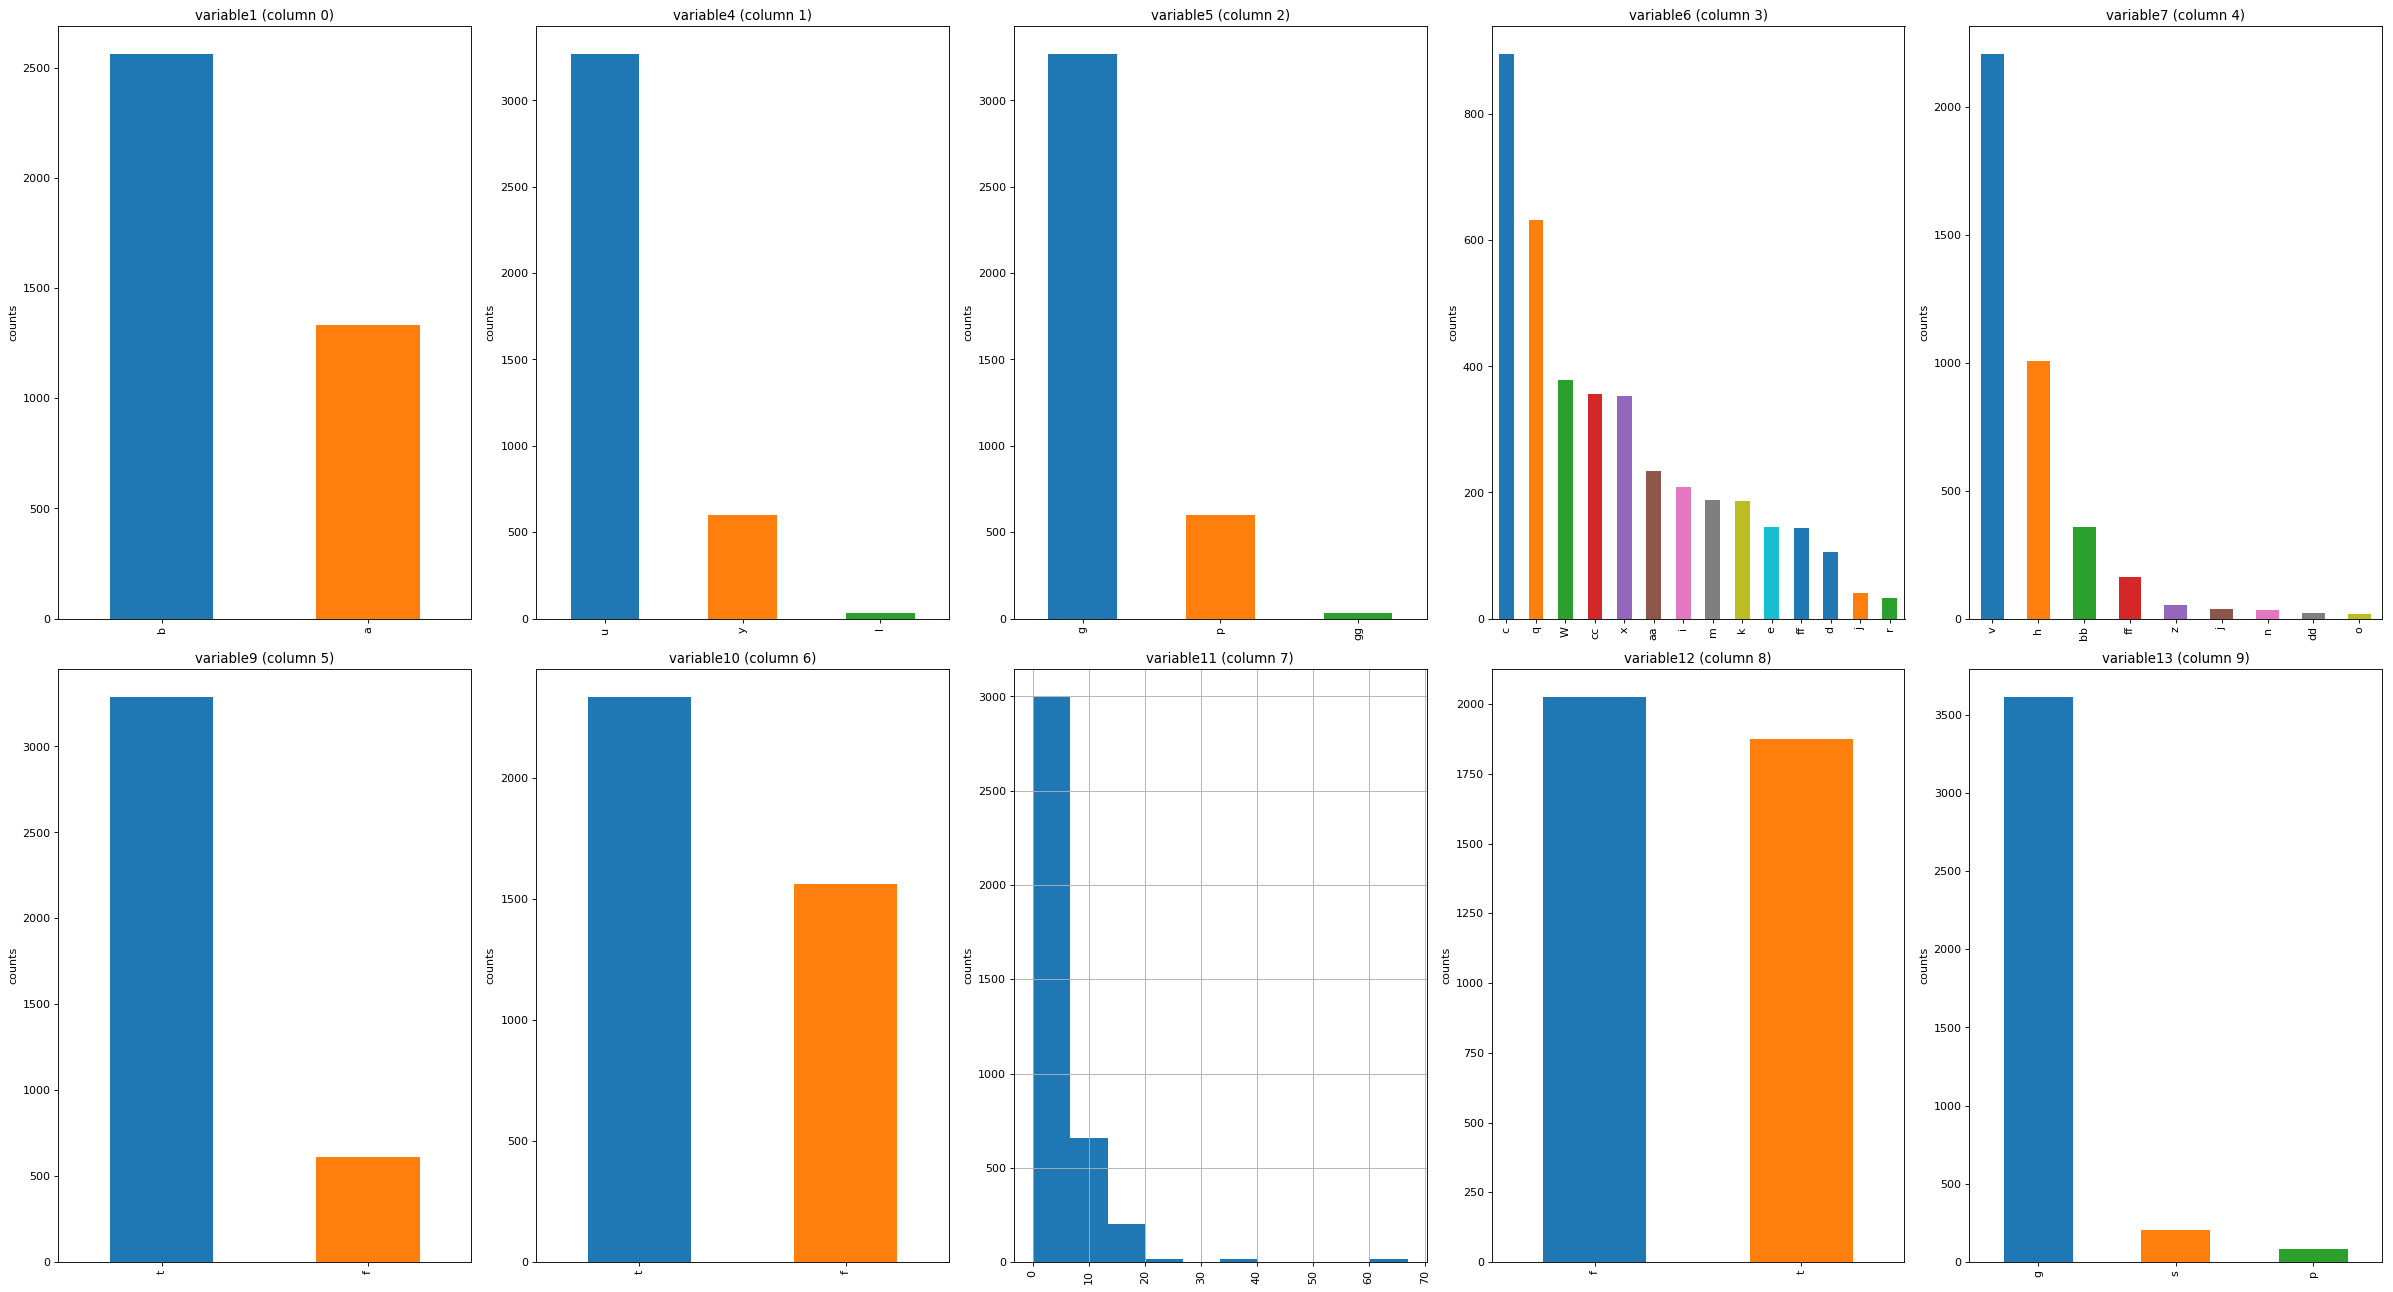

In [133]:
plotPerColumnDistribution(total, 10, 5)

# RandomUnderSampler

In [134]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=0)
rus.fit(X, y)
X_resampled, y_resampled = rus.sample(X, y)

In [135]:
# Import train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, 
                                                    y_resampled, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 601 samples.
Testing set has 151 samples.


In [136]:
sc_X = MinMaxScaler()
X_train_sc = sc_X.fit_transform(X_train)
X_test_sc = sc_X.transform(X_test)

In [139]:
train_predict(svm_clf, X_train, y_train, X_test, y_test)

Success


{'train_time': 0.3366358280181885,
 'pred_time': 0.08781242370605469,
 'acc_train': 0.9750415973377704,
 'acc_test': 0.8543046357615894,
 'f_train': 0.977366255144033,
 'f_test': 0.9171597633136095}

In [140]:
train_predict(dt_clf, X_train, y_train, X_test, y_test)

Success


{'train_time': 0.009971141815185547,
 'pred_time': 0.0,
 'acc_train': 1.0,
 'acc_test': 0.847682119205298,
 'f_train': 1.0,
 'f_test': 0.8620689655172413}

In [141]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train_sc, y_train)
y_pred = xgb_model.predict(X_test_sc)

accuracy_score(y_test, y_pred)

C:\Users\mahmoud\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.8543046357615894

# After RandomUnderSampler

* **SVMS** and **xgboost** Accuracy = 0.85

# Before RandomUnderSampler

* **Decision tree** Accuracy =  0.94
* **Xgboost** Accuracy = 0.94


